#  A preliminar study about the statistical uncertainties

In the following conditions

- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

the computation of the autocorrelation functions of pressure $P$ and potential energy per particle $U/N$ has been performed to approximately estimate how large the blocks should be. 
The same data have been used to study the estimation of the statistical uncertainties of the expectation value of $U/N$ and $P$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. 

## Solid phase 

- Computation along equilibrated Monte Carlo simulations of the autocorrelation functions of $U/N$ and $P$. The equilibration lasted 100 MC steps.

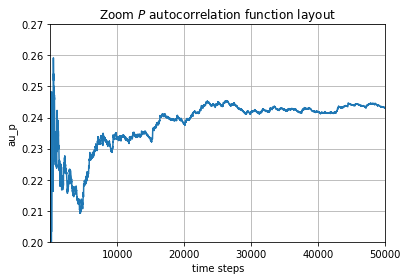

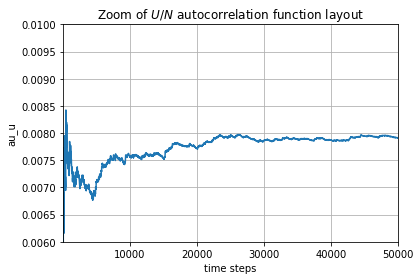

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

nstep = 500000
p = np.zeros(nstep)
u = np.zeros(nstep)
au_p = np.zeros(nstep)
au_u = np.zeros(nstep)

FilePres = open('solid_pres.istant', 'r')
FileEpot = open('solid_epot.istant', 'r')
k = 0
for line in FilePres:
    p[k] = float(line)
    k = k + 1
FilePres.close()
k = 0
for line in FileEpot:
    u[k] = float(line)
    k = k + 1
FileEpot.close()

sum_p = 0
sum2_p = 0
ave_p = 0
ave2_p = 0
sum_u = 0
sum2_u = 0
ave_u = 0
ave2_u = 0
for i in range(nstep):
    sum_p += p[i]
    sum2_p += p[i]*p[i]
    sum_u += u[i]
    sum2_u += u[i]*u[i]
    
    ave_p = sum_p
    ave2_p = sum2_p
    ave_p /= (i+1)
    ave2_p /= (i+1)
    ave_u = sum_u
    ave2_u = sum2_u
    ave_u /= (i+1)
    ave2_u /= (i+1)
    
    au_p[i] = ave2_p - ave_p*ave_p
    au_u[i] = ave2_u - ave_u*ave_u

t = np.arange(nstep)

plt.plot(t,au_p)
plt.xlim(1,5*10**4)
plt.ylim(0.20,0.27)
plt.xlabel('time steps')
plt.ylabel('au_p')
plt.grid('true')
plt.title('Zoom of $P$ autocorrelation function layout')

plt.show()

plt.plot(t,au_u)
plt.xlim(1,5*10**4)
plt.ylim(0.006,0.01)
plt.xlabel('time steps')
plt.ylabel('au_u')
plt.grid('true')
plt.title('Zoom of $U/N$ autocorrelation function layout')

plt.show()

- Estimation of the statistical uncertainties of the expectation value of $P$ for different size of the blocks in the data blocking technique.

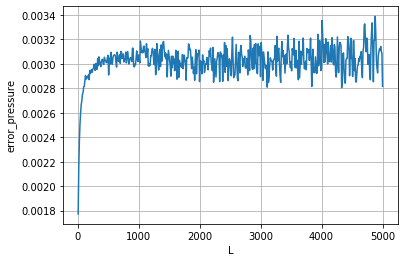

In [11]:
def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV**2)/n)

M = 500000
L = 10
j = 0

err_prog = np.zeros(500)
p = np.zeros(M)
l = np.zeros(500)
FilePres = open('solid_pres.istant')
for line in FilePres:
    p[j] = float(line)
    j = j+1
FilePres.close()

k = 0
t = 0
while(L<=5000):
    N = int(M/L)
    l[t] = L
    ave = np.zeros(N)
    ave2 = np.zeros(N)
    for i in range(N):
        sum = 0
        for j in range(L):
            k = j + i*L
            sum += p[k]
        ave[i] = sum/L
        ave2[i] = ave[i]*ave[i]
    ave_prog = 0
    ave2_prog = 0
    for i in range(N):
        ave_prog += ave[i] 
        ave2_prog += ave2[i] 
    ave_prog /= N 
    ave2_prog /= N 
    err_prog[t] = error(ave_prog,ave2_prog,N-1) # Statistical uncertainty
    L = L + 10
    t = t + 1
    

plt.plot(l,err_prog)
plt.xlabel('L') # of elements in a block
plt.ylabel('error_pressure')
plt.grid(True)
plt.show()      

- Estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique.

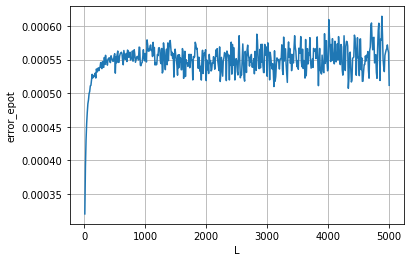

In [12]:
def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV**2)/n)

M = 500000
L = 10
j = 0

err_prog = np.zeros(500)
p = np.zeros(M)
l = np.zeros(500)
FileEpot = open('solid_epot.istant')
for line in FileEpot:
    u[i] = float(line)
    j = j+1
FileEpot.close()

k = 0
t = 0
while(L<=5000):
    N = int(M/L)
    l[t] = L
    ave = np.zeros(N)
    ave2 = np.zeros(N)
    for i in range(N):
        sum = 0
        for j in range(L):
            k = j + i*L
            sum += u[k]
        ave[i] = sum/L
        ave2[i] = ave[i]*ave[i]
    ave_prog = 0
    ave2_prog = 0
    for i in range(N):
        ave_prog += ave[i] 
        ave2_prog += ave2[i] 
    ave_prog /= N 
    ave2_prog /= N 
    err_prog[t] = error(ave_prog,ave2_prog,N-1) # Statistical uncertainty
    L = L + 10
    t = t + 1
    

plt.plot(l,err_prog)
plt.xlabel('L') # of elements in a block
plt.ylabel('error_epot')
plt.grid(True)
plt.show()      

## Liquid phase

- Computation along equilibrated Monte Carlo simulations of the autocorrelation functions of $U/N$ and $P$. The equilibration lasted 500 MC steps.

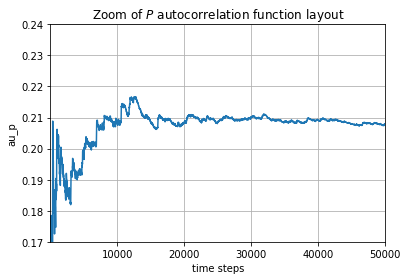

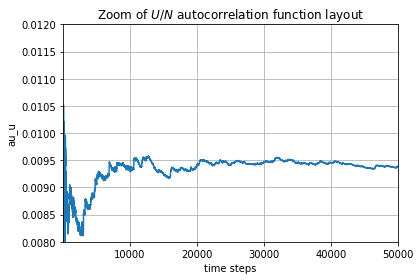

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

nstep = 500000
p = np.zeros(nstep)
u = np.zeros(nstep)
au_p = np.zeros(nstep)
au_u = np.zeros(nstep)

FilePres = open('liquid_pres.istant', 'r')
FileEpot = open('liquid_epot.istant', 'r')
k = 0
for line in FilePres:
    p[k] = float(line)
    k = k + 1
FilePres.close()
k = 0
for line in FileEpot:
    u[k] = float(line)
    k = k + 1
FileEpot.close()

sum_p = 0
sum2_p = 0
ave_p = 0
ave2_p = 0
sum_u = 0
sum2_u = 0
ave_u = 0
ave2_u = 0
for i in range(nstep):
    sum_p += p[i]
    sum2_p += p[i]*p[i]
    sum_u += u[i]
    sum2_u += u[i]*u[i]
    
    ave_p = sum_p
    ave2_p = sum2_p
    ave_p /= (i+1)
    ave2_p /= (i+1)
    ave_u = sum_u
    ave2_u = sum2_u
    ave_u /= (i+1)
    ave2_u /= (i+1)
    au_p[i] = ave2_p - ave_p*ave_p
    au_u[i] = ave2_u - ave_u*ave_u

t = np.arange(nstep)
plt.plot(t,au_p)
plt.xlim(1,5*10**4)
plt.ylim(0.17,0.24)
plt.xlabel('time steps')
plt.ylabel('au_p')
plt.grid('true')
plt.title('Zoom of $P$ autocorrelation function layout')

plt.show()

plt.plot(t,au_u)
plt.xlim(1,5*10**4)
plt.ylim(0.008,0.012)
plt.xlabel('time steps')
plt.ylabel('au_u')
plt.grid('true')
plt.title('Zoom of $U/N$ autocorrelation function layout')

plt.show()

- Estimation of the statistical uncertainties of the expectation value of $P$ for different size of the blocks in the data blocking technique.

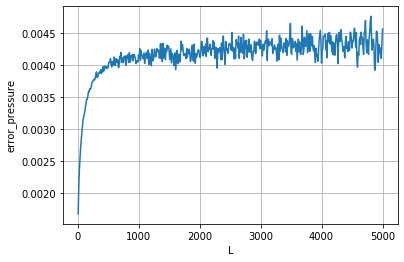

In [19]:
def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV**2)/n)

M = 500000
L = 10
i = 0

err_prog = np.zeros(500)
p = np.zeros(M)
l = np.zeros(500)
ReadPres = open('liquid_pres.istant')
for line in ReadPres:
    p[i] = float(line)
    i = i+1
ReadPres.close()

k = 0
t = 0
while(L<=5000):
    N = int(M/L)
    l[t] = L
    ave = np.zeros(N)
    ave2 = np.zeros(N)
    for i in range(N):
        sum = 0
        for j in range(L):
            k = j + i*L
            sum += p[k]
        ave[i] = sum/L
        ave2[i] = ave[i]*ave[i]
    ave_prog = 0
    ave2_prog = 0
    for i in range(N):
        ave_prog += ave[i] 
        ave2_prog += ave2[i] 
    ave_prog /= N 
    ave2_prog /= N 
    err_prog[t] = error(ave_prog,ave2_prog,N-1) # Statistical uncertainty
    L = L + 10
    t = t + 1
    

plt.plot(l,err_prog)
plt.xlabel('L') # of elements in a block
plt.ylabel('error_pressure')
plt.grid(True)
plt.show()      

- Estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique.

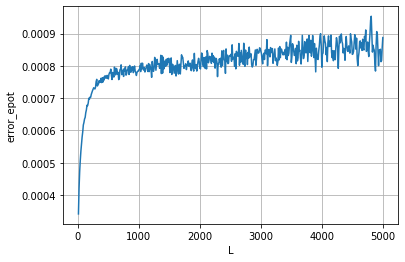

In [20]:
def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV**2)/n)

M = 500000
L = 10
i = 0

err_prog = np.zeros(500)
p = np.zeros(M)
l = np.zeros(500)
ReadPres = open('liquid_epot.istant')
for line in ReadPres:
    p[i] = float(line)
    i = i+1
ReadPres.close()

k = 0
t = 0
while(L<=5000):
    N = int(M/L)
    l[t] = L
    ave = np.zeros(N)
    ave2 = np.zeros(N)
    for i in range(N):
        sum = 0
        for j in range(L):
            k = j + i*L
            sum += p[k]
        ave[i] = sum/L
        ave2[i] = ave[i]*ave[i]
    ave_prog = 0
    ave2_prog = 0
    for i in range(N):
        ave_prog += ave[i] 
        ave2_prog += ave2[i] 
    ave_prog /= N 
    ave2_prog /= N 
    err_prog[t] = error(ave_prog,ave2_prog,N-1) # Statistical uncertainty
    L = L + 10
    t = t + 1
    

plt.plot(l,err_prog)
plt.xlabel('L') # of elements in a block
plt.ylabel('error_epot')
plt.grid(True)
plt.show()      

## Gas phase 

- Computation along equilibrated Monte Carlo simulations of the autocorrelation functions of $U/N$ and $P$. The equilibration lasted 200 MC steps.

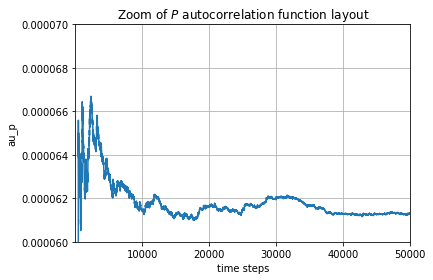

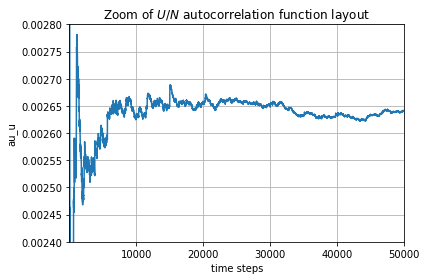

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

nstep = 500000
p = np.zeros(nstep)
u = np.zeros(nstep)
au_p = np.zeros(nstep)
au_u = np.zeros(nstep)

FilePres = open('gas_pres.istant', 'r')
FileEpot = open('gas_epot.istant', 'r')
k = 0
for line in FilePres:
    p[k] = float(line)
    k = k + 1
FilePres.close()
k = 0
for line in FileEpot:
    u[k] = float(line)
    k = k + 1
FileEpot.close()
sum_p = 0
sum2_p = 0
ave_p = 0
ave2_p = 0
sum_u = 0
sum2_u = 0
ave_u = 0
ave2_u = 0
for i in range(nstep):
    sum_p += p[i]
    sum2_p += p[i]*p[i]
    sum_u += u[i]
    sum2_u += u[i]*u[i]
    
    ave_p = sum_p
    ave2_p = sum2_p
    ave_p /= (i+1)
    ave2_p /= (i+1)
    ave_u = sum_u
    ave2_u = sum2_u
    ave_u /= (i+1)
    ave2_u /= (i+1)
    au_p[i] = ave2_p - ave_p*ave_p
    au_u[i] = ave2_u - ave_u*ave_u

t = np.arange(nstep)
plt.plot(t,au_p)
plt.xlim(1,5*10**4)
plt.ylim(0.00006,0.00007)
plt.xlabel('time steps')
plt.ylabel('au_p')
plt.grid('true')
plt.title('Zoom of $P$ autocorrelation function layout')

plt.show()

plt.plot(t,au_u)
plt.xlim(1,5*10**4)
plt.ylim(0.0024,0.0028)
plt.xlabel('time steps')
plt.ylabel('au_u')
plt.grid('true')
plt.title('Zoom of $U/N$ autocorrelation function layout')

plt.show()

- Estimation of the statistical uncertainties of the expectation value of $P$ for different size of the blocks in the data blocking technique.

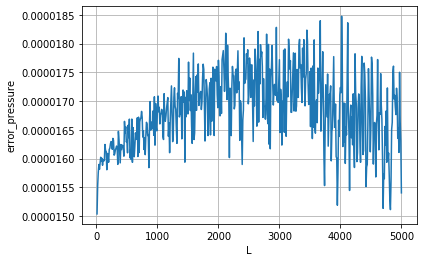

In [23]:
def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV**2)/n)

M = 500000
L = 10
i = 0

err_prog = np.zeros(500)
p = np.zeros(M)
l = np.zeros(500)
ReadPres = open('gas_pres.istant')
for line in ReadPres:
    p[i] = float(line)
    i = i+1
ReadPres.close()

k = 0
t = 0
while(L<=5000):
    N = int(M/L)
    l[t] = L
    ave = np.zeros(N)
    ave2 = np.zeros(N)
    for i in range(N):
        sum = 0
        for j in range(L):
            k = j + i*L
            sum += p[k]
        ave[i] = sum/L
        ave2[i] = ave[i]*ave[i]
    ave_prog = 0
    ave2_prog = 0
    for i in range(N):
        ave_prog += ave[i] 
        ave2_prog += ave2[i] 
    ave_prog /= N 
    ave2_prog /= N 
    err_prog[t] = error(ave_prog,ave2_prog,N-1) # Statistical uncertainty
    L = L + 10
    t = t + 1
    

plt.plot(l,err_prog)
plt.xlabel('L') # of elements in a block
plt.ylabel('error_pressure')
plt.grid(True)
plt.show()      

- Estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique.

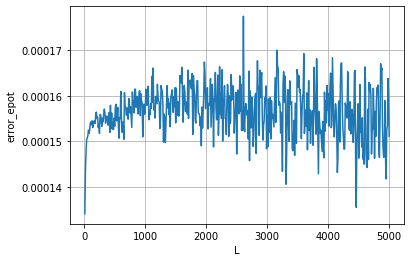

In [24]:
def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV**2)/n)

M = 500000
L = 10
i = 0

err_prog = np.zeros(500)
p = np.zeros(M)
l = np.zeros(500)
ReadPres = open('gas_epot.istant')
for line in ReadPres:
    p[i] = float(line)
    i = i+1
ReadPres.close()

k = 0
t = 0
while(L<=5000):
    N = int(M/L)
    l[t] = L
    ave = np.zeros(N)
    ave2 = np.zeros(N)
    for i in range(N):
        sum = 0
        for j in range(L):
            k = j + i*L
            sum += p[k]
        ave[i] = sum/L
        ave2[i] = ave[i]*ave[i]
    ave_prog = 0
    ave2_prog = 0
    for i in range(N):
        ave_prog += ave[i] 
        ave2_prog += ave2[i] 
    ave_prog /= N 
    ave2_prog /= N 
    err_prog[t] = error(ave_prog,ave2_prog,N-1) # Statistical uncertainty
    L = L + 10
    t = t + 1
    

plt.plot(l,err_prog)
plt.xlabel('L') # of elements in a block
plt.ylabel('error_epot')
plt.grid(True)
plt.show()      

- Observation 

    After that the block size is large enough the statistical uncertainties start to oscillate around a value. This is the behaviour that one should excpect in a Monte Carlo simulation when the principal source of error is the statistical error and the systematic errors, (as instance, those due to correlation) have been minimized. In such case, the statistical error is due to the fluctuations of the measured value of a quantity from one time step to the next. This error is inherent in the Monte Carlo method.

# Monte Carlo NVT simulations of Argon

Equilibration and simulation via a Lennard-Jones model of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:

- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

It will be show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ (in SI units) and the radial distribution function $g(r)$. This last quantity will be compared with the results of the same system obtained with a Molecular Dynamics NVE code.

## Argon solid phase

- In the liquid phase have been used 2000 steps in every block for 250 blocks

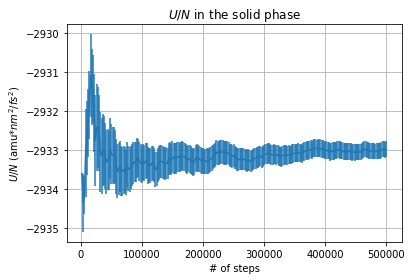

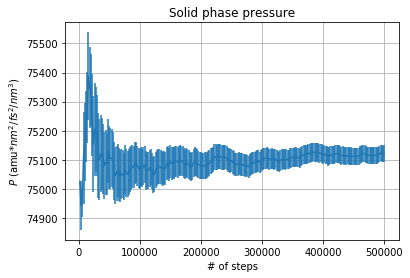

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

e_f = 388.68 #in order to rescale energy
l_f = 0.34 #in order to rescale length

x, f, error = np.loadtxt("solid_output.epot.0", usecols=(0,2,3), delimiter='   ', unpack='true')
x = x * 2000
f = f * e_f
error = error * e_f
plt.errorbar(x,f,yerr=error)
plt.xlabel('# of steps')
plt.ylabel('$U/N$ (amu*$nm^2$/$fs^2$)')
plt.grid('true')
plt.title('$U/N$ in the solid phase')

plt.show()

x, f, error = np.loadtxt("solid_output.pres.0", usecols=(0,2,3), delimiter='   ', unpack='true')
x = x * 2000
f = f * e_f / pow(l_f,3)
error = error * e_f / pow(l_f,3)
plt.errorbar(x,f,yerr=error)
plt.xlabel('# of steps')
plt.ylabel('$P$ (amu*$nm^2$/$fs^2$/$nm^3$)')
plt.grid('true')
plt.title('Solid phase pressure')

plt.show()

- Comparison between the radial distribution function obtained with Molecular Dynamics (NVE) (4000 steps for each block for 40 blocks) and Monte Carlo (NVT)

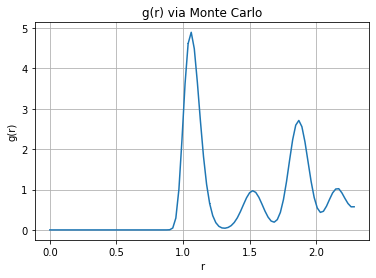

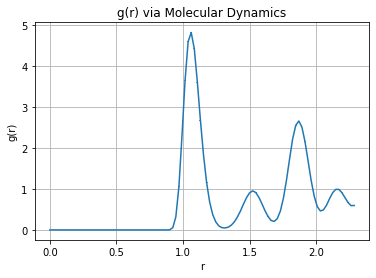

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x, f, error = np.loadtxt("solid_output.gave.0", usecols=(1,3,4), delimiter='   ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.grid('true')
plt.title('g(r) via Monte Carlo')

plt.show()

x, f, error = np.loadtxt("solid_NVE_gave.out", usecols=(1,3,4), delimiter='   ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.grid('true')
plt.title('g(r) via Molecular Dynamics')

plt.show()

## Argon liquid phase

- In the solid phase have been used 2500 steps in every block for 200 blocks

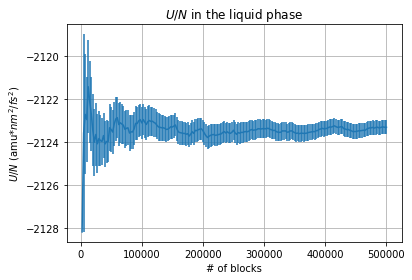

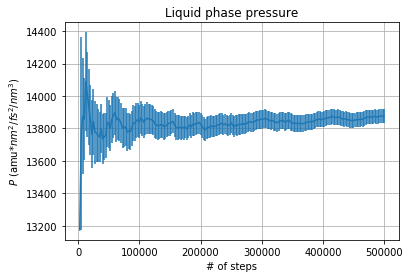

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

e_f = 388.68 #in order to rescale energy
l_f = 0.34 #in order to rescale length

x, f, error = np.loadtxt("liquid_output.epot.0", usecols=(0,2,3), delimiter='   ', unpack='true')
x = x * 2500
f = f * e_f
error = error * e_f
plt.errorbar(x,f,yerr=error)
plt.xlabel('# of steps')
plt.ylabel('$U/N$ (amu*$nm^2$/$fs^2$)')
plt.grid('true')
plt.title('$U/N$ in the liquid phase')

plt.show()

x, f, error = np.loadtxt("liquid_output.pres.0", usecols=(0,2,3), delimiter='   ', unpack='true')
x = x * 2500
f = f * e_f / pow(l_f,3)
error = error * e_f / pow(l_f,3)
plt.errorbar(x,f,yerr=error)
plt.xlabel('# of steps')
plt.ylabel('$P$ (amu*$nm^2$/$fs^2$/$nm^3$)')
plt.grid('true')
plt.title('Liquid phase pressure')

plt.show()

- Comparison between the radial distribution function obtained with Molecular Dynamics (NVE) (3200 steps for each block for 50 blocks) and Monte Carlo (NVT)

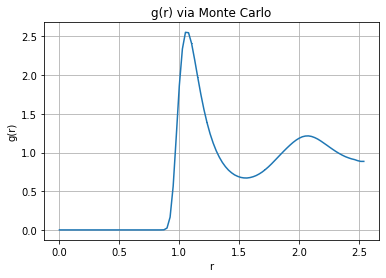

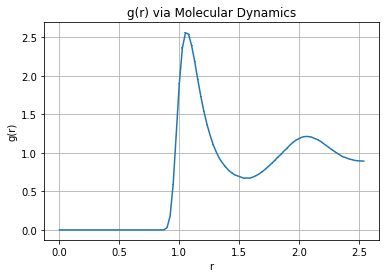

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x, f, error = np.loadtxt("liquid_output.gave.0", usecols=(1,3,4), delimiter='   ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.grid('true')
plt.title('g(r) via Monte Carlo')

plt.show()

x, f, error = np.loadtxt("liquid_NVE_gave.out", usecols=(1,3,4), delimiter='   ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.grid('true')
plt.title('g(r) via Molecular Dynamics')

plt.show()

## Argon gas phase

- In the gas phase have been used 5000 steps in every block for 100 blocks

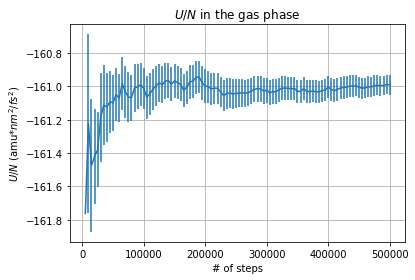

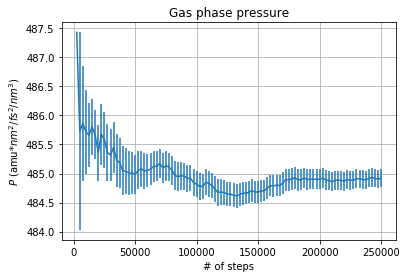

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

e_f = 388.68 #in order to rescale energy
l_f = 0.34 #in order to rescale length

x, f, error = np.loadtxt("gas_output.epot.0", usecols=(0,2,3), delimiter='   ', unpack='true')
x = x * 5000
f = f * e_f
error = error * e_f
plt.errorbar(x,f,yerr=error)
plt.xlabel('# of steps')
plt.ylabel('$U/N$ (amu*$nm^2$/$fs^2$)')
plt.grid('true')
plt.title('$U/N$ in the gas phase')

plt.show()

x, f, error = np.loadtxt("gas_output.pres.0", usecols=(0,2,3), delimiter='   ', unpack='true')
x = x * 2500
f = f * e_f / pow(l_f,3)
error = error * e_f / pow(l_f,3)
plt.errorbar(x,f,yerr=error)
plt.xlabel('# of steps')
plt.ylabel('$P$ (amu*$nm^2$/$fs^2$/$nm^3$)')
plt.grid('true')
plt.title('Gas phase pressure')

plt.show()

- Comparison between the radial distribution function obtained with Molecular Dynamics (NVE) (2500 steps for each block for 64 blocks) and Monte Carlo (NVT)

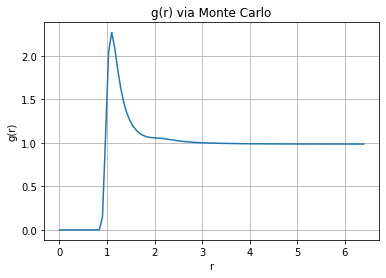

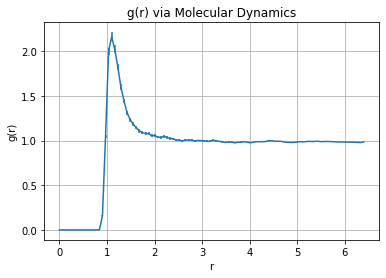

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x, f, error = np.loadtxt("gas_output.gave.0", usecols=(1,3,4), delimiter='   ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.grid('true')
plt.title('g(r) via Monte Carlo')

plt.show()

x, f, error = np.loadtxt("gas_NVE_gave.out", usecols=(1,3,4), delimiter='   ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.grid('true')
plt.title('g(r) via Molecular Dynamics')

plt.show()